In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data


In [0]:
from  tqdm import tqdm

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

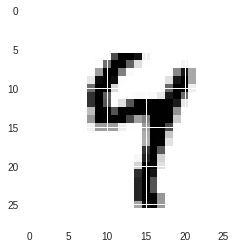

Corresponding one hot label of the image [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [4]:
#printing sample image and its corresponding label
plt.imshow(np.reshape((mnist.train.images[2]) , (28,28)))
plt.show()
print("Corresponding one hot label of the image " + str( mnist.train.labels[2]))

In [0]:
#image_size = 28
#labels_size = 10
learning_rate = [1e-4, 1e-3, 2e-4, 2e-3, 3e-4, 3e-3, 6e-3, 2e-2, 1e-1, 1]
#steps_number = 1000
#batch_size = 100

In [0]:
def create_placeholders():
    x = tf.placeholder(tf.float32, shape = [None, 784])
    y_ = tf.placeholder(tf.float32, shape = [None, 10])
    return x , y_

In [0]:
#Function for initializing weights
def weight_variable(shape, i):
    
    initial = tf.get_variable(name = "W" + str(i)  , shape = shape, initializer = tf.contrib.layers.xavier_initializer())
    return initial

#Function for bias
def bias_variable(shape):
    
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)    
  
#Function for convolution with stride = s and same padding!!!!! For example stride = 1 =>[1,1,1,1]
def conv2d(x, W, s):
     
    return tf.nn.conv2d(input = x, filter = W, padding = "SAME", strides = s)

#Function of max pooling over 2*2 block 
def max_pooling_2x2(x):
    
    return tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,2,2,1] ,padding = "SAME")

In [0]:

# The architecture is similar to https://www.tensorflow.org/get_started/mnist/pros without applying the batch normalization
x, y_ = create_placeholders()

# Input layer where single input image shape is (1,784)
x_image = tf.reshape(x, [-1,28,28,1])

# Convolution layer 1 - 32 x 5 x 5 
# Conv -> Relu -> Max_pool
W_conv1 = weight_variable([5, 5, 1, 32], 1)
b_conv1 = bias_variable([32])
x_conv1 = conv2d(x_image, W_conv1, [1,1,1,1]) + b_conv1
y1 = tf.nn.relu(x_conv1)
x_pool1 = max_pooling_2x2(y1)

# Conv layer 2 - 64 x 5 x 5
# Conv -> Relu -> Max_pool
W_conv2 = weight_variable([5, 5, 32, 64], 2)
b_conv2 = bias_variable([64])
x_conv2 = conv2d(x_pool1, W_conv2, [1,1,1,1]) + b_conv2
y2 = tf.nn.relu(x_conv2)
x_pool2 = max_pooling_2x2(y2)

# Flatten 

x_flat = tf.contrib.layers.flatten(x_pool2)  #tf.reshape(x_pool2, [-1, 7 * 7 * 64])

# Dense fully connected layer
x_fc1 = tf.contrib.layers.fully_connected(x_flat, num_outputs = 1024 , activation_fn= tf.nn.relu )    #Tensorflow here takes care of the bias

#Here try 1 without Dropout

#Classification Layer
y_conv = tf.contrib.layers.fully_connected(x_fc1, num_outputs = 10, activation_fn= None)               #Tensorflow here takes care of the bias

In [9]:

# Probabilities output from model
y = tf.nn.softmax(y_conv)

#compute cost
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits=y_conv))
#train step
train_step0 = tf.train.AdamOptimizer(learning_rate[0]).minimize(cross_entropy)
train_step1 = tf.train.AdamOptimizer(learning_rate[1]).minimize(cross_entropy)
train_step2 = tf.train.AdamOptimizer(learning_rate[2]).minimize(cross_entropy)
train_step3 = tf.train.AdamOptimizer(learning_rate[3]).minimize(cross_entropy)
train_step4 = tf.train.AdamOptimizer(learning_rate[4]).minimize(cross_entropy)
train_step5 = tf.train.AdamOptimizer(learning_rate[5]).minimize(cross_entropy)
train_step6 = tf.train.AdamOptimizer(learning_rate[6]).minimize(cross_entropy)
train_step7 = tf.train.AdamOptimizer(learning_rate[7]).minimize(cross_entropy)
train_step8 = tf.train.AdamOptimizer(learning_rate[8]).minimize(cross_entropy)
train_step9 = tf.train.AdamOptimizer(learning_rate[9]).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))     #Returns the index with the largest value across axes of a tensor.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.08


 10%|█         | 10/100 [00:04<00:35,  2.50it/s]

Epoch 10, training accuracy 0.23


 20%|██        | 20/100 [00:08<00:31,  2.55it/s]

Epoch 20, training accuracy 0.4


 30%|███       | 30/100 [00:11<00:27,  2.52it/s]

Epoch 30, training accuracy 0.56


 40%|████      | 40/100 [00:15<00:23,  2.52it/s]

Epoch 40, training accuracy 0.65


 50%|█████     | 50/100 [00:19<00:19,  2.54it/s]

Epoch 50, training accuracy 0.62


 60%|██████    | 60/100 [00:23<00:15,  2.53it/s]

Epoch 60, training accuracy 0.86


 70%|███████   | 70/100 [00:27<00:11,  2.55it/s]

Epoch 70, training accuracy 0.85


 80%|████████  | 80/100 [00:31<00:07,  2.55it/s]

Epoch 80, training accuracy 0.86


 90%|█████████ | 90/100 [00:35<00:03,  2.54it/s]

Epoch 90, training accuracy 0.94


100%|██████████| 100/100 [00:39<00:00,  2.56it/s]


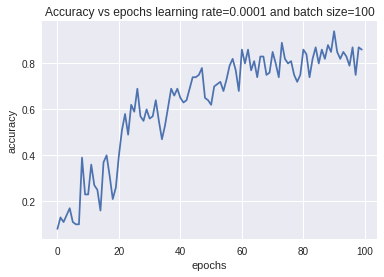

In [55]:
#0
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 100

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step0.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[0], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.09


 10%|█         | 10/100 [00:04<00:35,  2.51it/s]

Epoch 10, training accuracy 0.16


 20%|██        | 20/100 [00:07<00:31,  2.55it/s]

Epoch 20, training accuracy 0.35


 30%|███       | 30/100 [00:11<00:27,  2.55it/s]

Epoch 30, training accuracy 0.62


 40%|████      | 40/100 [00:15<00:23,  2.56it/s]

Epoch 40, training accuracy 0.86


 50%|█████     | 50/100 [00:19<00:19,  2.55it/s]

Epoch 50, training accuracy 0.81


 60%|██████    | 60/100 [00:23<00:15,  2.57it/s]

Epoch 60, training accuracy 0.81


 70%|███████   | 70/100 [00:27<00:11,  2.57it/s]

Epoch 70, training accuracy 0.91


 80%|████████  | 80/100 [00:31<00:07,  2.54it/s]

Epoch 80, training accuracy 0.96


 90%|█████████ | 90/100 [00:35<00:03,  2.55it/s]

Epoch 90, training accuracy 0.94


100%|██████████| 100/100 [00:39<00:00,  2.55it/s]


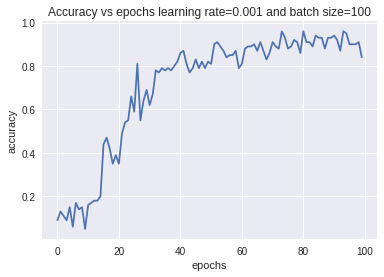

In [56]:
#1
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 100

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step1.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[1], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.12


 10%|█         | 10/100 [00:04<00:35,  2.50it/s]

Epoch 10, training accuracy 0.43


 20%|██        | 20/100 [00:08<00:31,  2.52it/s]

Epoch 20, training accuracy 0.71


 30%|███       | 30/100 [00:11<00:27,  2.55it/s]

Epoch 30, training accuracy 0.71


 40%|████      | 40/100 [00:15<00:23,  2.51it/s]

Epoch 40, training accuracy 0.71


 50%|█████     | 50/100 [00:19<00:19,  2.53it/s]

Epoch 50, training accuracy 0.85


 60%|██████    | 60/100 [00:23<00:15,  2.53it/s]

Epoch 60, training accuracy 0.88


 70%|███████   | 70/100 [00:27<00:12,  2.49it/s]

Epoch 70, training accuracy 0.83


 80%|████████  | 80/100 [00:31<00:07,  2.52it/s]

Epoch 80, training accuracy 0.89


 90%|█████████ | 90/100 [00:35<00:03,  2.53it/s]

Epoch 90, training accuracy 0.82


100%|██████████| 100/100 [00:39<00:00,  2.52it/s]


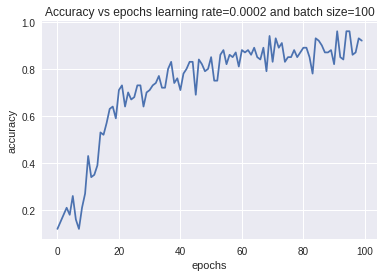

In [57]:
#2
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 100

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step2.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[2], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.13


 10%|█         | 10/100 [00:04<00:35,  2.50it/s]

Epoch 10, training accuracy 0.1


 20%|██        | 20/100 [00:08<00:31,  2.55it/s]

Epoch 20, training accuracy 0.1


 30%|███       | 30/100 [00:11<00:27,  2.54it/s]

Epoch 30, training accuracy 0.1


 40%|████      | 40/100 [00:15<00:23,  2.53it/s]

Epoch 40, training accuracy 0.06


 50%|█████     | 50/100 [00:19<00:19,  2.54it/s]

Epoch 50, training accuracy 0.1


 60%|██████    | 60/100 [00:23<00:15,  2.52it/s]

Epoch 60, training accuracy 0.13


 70%|███████   | 70/100 [00:27<00:11,  2.52it/s]

Epoch 70, training accuracy 0.11


 80%|████████  | 80/100 [00:31<00:08,  2.49it/s]

Epoch 80, training accuracy 0.12


 90%|█████████ | 90/100 [00:35<00:04,  2.46it/s]

Epoch 90, training accuracy 0.11


100%|██████████| 100/100 [00:39<00:00,  2.49it/s]


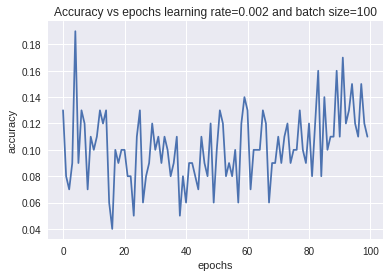

In [58]:
#3
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 100

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step3.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[3], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.13


 10%|█         | 10/100 [00:04<00:36,  2.47it/s]

Epoch 10, training accuracy 0.43


 20%|██        | 20/100 [00:08<00:31,  2.50it/s]

Epoch 20, training accuracy 0.67


 30%|███       | 30/100 [00:12<00:27,  2.52it/s]

Epoch 30, training accuracy 0.72


 40%|████      | 40/100 [00:16<00:23,  2.52it/s]

Epoch 40, training accuracy 0.81


 50%|█████     | 50/100 [00:20<00:19,  2.52it/s]

Epoch 50, training accuracy 0.91


 60%|██████    | 60/100 [00:24<00:15,  2.51it/s]

Epoch 60, training accuracy 0.82


 70%|███████   | 70/100 [00:28<00:11,  2.52it/s]

Epoch 70, training accuracy 0.87


 80%|████████  | 80/100 [00:32<00:08,  2.41it/s]

Epoch 80, training accuracy 0.92


 90%|█████████ | 90/100 [00:36<00:04,  2.38it/s]

Epoch 90, training accuracy 0.93


100%|██████████| 100/100 [00:40<00:00,  2.48it/s]


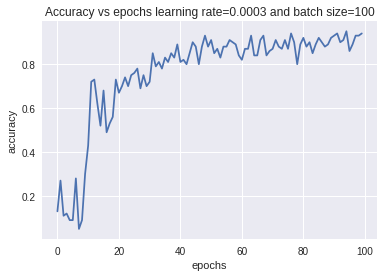

In [59]:
#4
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 100

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step4.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[4], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.05


 10%|█         | 10/100 [00:04<00:35,  2.52it/s]

Epoch 10, training accuracy 0.1


 20%|██        | 20/100 [00:07<00:31,  2.55it/s]

Epoch 20, training accuracy 0.14


 30%|███       | 30/100 [00:11<00:27,  2.56it/s]

Epoch 30, training accuracy 0.34


 40%|████      | 40/100 [00:15<00:23,  2.55it/s]

Epoch 40, training accuracy 0.7


 50%|█████     | 50/100 [00:19<00:19,  2.53it/s]

Epoch 50, training accuracy 0.74


 60%|██████    | 60/100 [00:23<00:15,  2.55it/s]

Epoch 60, training accuracy 0.86


 70%|███████   | 70/100 [00:27<00:11,  2.55it/s]

Epoch 70, training accuracy 0.86


 80%|████████  | 80/100 [00:31<00:07,  2.55it/s]

Epoch 80, training accuracy 0.88


 90%|█████████ | 90/100 [00:35<00:03,  2.56it/s]

Epoch 90, training accuracy 0.92


100%|██████████| 100/100 [00:39<00:00,  2.55it/s]


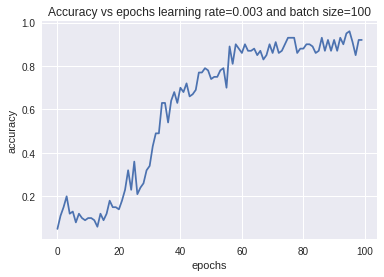

In [60]:
#5
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 100

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step5.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[5], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.14


 10%|█         | 10/100 [00:04<00:35,  2.51it/s]

Epoch 10, training accuracy 0.24


 20%|██        | 20/100 [00:08<00:31,  2.52it/s]

Epoch 20, training accuracy 0.55


 30%|███       | 30/100 [00:12<00:27,  2.50it/s]

Epoch 30, training accuracy 0.78


 40%|████      | 40/100 [00:16<00:23,  2.51it/s]

Epoch 40, training accuracy 0.75


 50%|█████     | 50/100 [00:20<00:20,  2.50it/s]

Epoch 50, training accuracy 0.82


 60%|██████    | 60/100 [00:24<00:15,  2.51it/s]

Epoch 60, training accuracy 0.88


 70%|███████   | 70/100 [00:28<00:12,  2.48it/s]

Epoch 70, training accuracy 0.96


 80%|████████  | 80/100 [00:32<00:07,  2.52it/s]

Epoch 80, training accuracy 0.95


 90%|█████████ | 90/100 [00:35<00:03,  2.52it/s]

Epoch 90, training accuracy 0.92


100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


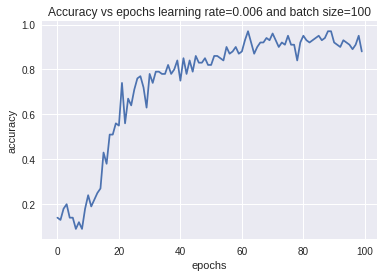

In [61]:
#6
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 100

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step6.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[6], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.07


 10%|█         | 10/100 [00:04<00:35,  2.52it/s]

Epoch 10, training accuracy 0.21


 20%|██        | 20/100 [00:07<00:31,  2.54it/s]

Epoch 20, training accuracy 0.47


 30%|███       | 30/100 [00:11<00:28,  2.48it/s]

Epoch 30, training accuracy 0.63


 40%|████      | 40/100 [00:15<00:23,  2.53it/s]

Epoch 40, training accuracy 0.69


 50%|█████     | 50/100 [00:19<00:19,  2.53it/s]

Epoch 50, training accuracy 0.82


 60%|██████    | 60/100 [00:23<00:15,  2.53it/s]

Epoch 60, training accuracy 0.87


 70%|███████   | 70/100 [00:27<00:11,  2.52it/s]

Epoch 70, training accuracy 0.91


 80%|████████  | 80/100 [00:31<00:07,  2.51it/s]

Epoch 80, training accuracy 0.94


 90%|█████████ | 90/100 [00:35<00:03,  2.52it/s]

Epoch 90, training accuracy 0.87


100%|██████████| 100/100 [00:39<00:00,  2.55it/s]


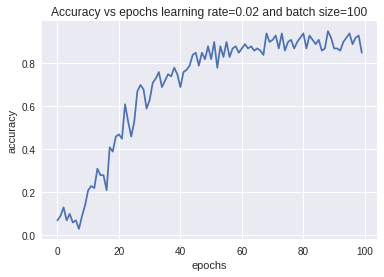

In [62]:
#7
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 100

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step7.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[7], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.09


 10%|█         | 10/100 [00:04<00:35,  2.51it/s]

Epoch 10, training accuracy 0.15


 20%|██        | 20/100 [00:08<00:31,  2.53it/s]

Epoch 20, training accuracy 0.12


 30%|███       | 30/100 [00:12<00:27,  2.53it/s]

Epoch 30, training accuracy 0.12


 40%|████      | 40/100 [00:15<00:23,  2.52it/s]

Epoch 40, training accuracy 0.1


 50%|█████     | 50/100 [00:19<00:19,  2.54it/s]

Epoch 50, training accuracy 0.08


 60%|██████    | 60/100 [00:23<00:15,  2.53it/s]

Epoch 60, training accuracy 0.11


 70%|███████   | 70/100 [00:27<00:11,  2.54it/s]

Epoch 70, training accuracy 0.12


 80%|████████  | 80/100 [00:31<00:07,  2.55it/s]

Epoch 80, training accuracy 0.16


 90%|█████████ | 90/100 [00:35<00:03,  2.54it/s]

Epoch 90, training accuracy 0.1


100%|██████████| 100/100 [00:39<00:00,  2.54it/s]


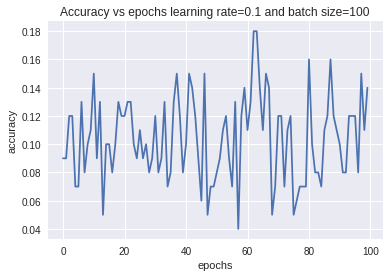

In [63]:
#8
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 100

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step8.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[8], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.11


 10%|█         | 10/100 [00:04<00:36,  2.49it/s]

Epoch 10, training accuracy 0.08


 20%|██        | 20/100 [00:08<00:31,  2.52it/s]

Epoch 20, training accuracy 0.1


 30%|███       | 30/100 [00:11<00:26,  2.59it/s]

Epoch 30, training accuracy 0.09


 40%|████      | 40/100 [00:15<00:23,  2.60it/s]

Epoch 40, training accuracy 0.1


 50%|█████     | 50/100 [00:19<00:19,  2.63it/s]

Epoch 50, training accuracy 0.06


 60%|██████    | 60/100 [00:23<00:15,  2.62it/s]

Epoch 60, training accuracy 0.11


 70%|███████   | 70/100 [00:27<00:11,  2.62it/s]

Epoch 70, training accuracy 0.06


 80%|████████  | 80/100 [00:31<00:07,  2.61it/s]

Epoch 80, training accuracy 0.11


 90%|█████████ | 90/100 [00:34<00:03,  2.65it/s]

Epoch 90, training accuracy 0.14


100%|██████████| 100/100 [00:38<00:00,  2.60it/s]


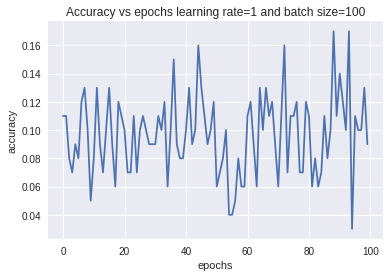

In [64]:
#9
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 100

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step9.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[9], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()

**Varying Batch Size**

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.12


 11%|█         | 11/100 [00:02<00:19,  4.51it/s]

Epoch 10, training accuracy 0.48


 21%|██        | 21/100 [00:04<00:17,  4.61it/s]

Epoch 20, training accuracy 0.24


 31%|███       | 31/100 [00:06<00:15,  4.57it/s]

Epoch 30, training accuracy 0.34


 41%|████      | 41/100 [00:09<00:12,  4.60it/s]

Epoch 40, training accuracy 0.54


 51%|█████     | 51/100 [00:11<00:10,  4.62it/s]

Epoch 50, training accuracy 0.72


 61%|██████    | 61/100 [00:13<00:08,  4.54it/s]

Epoch 60, training accuracy 0.74


 71%|███████   | 71/100 [00:15<00:06,  4.57it/s]

Epoch 70, training accuracy 0.74


 81%|████████  | 81/100 [00:17<00:04,  4.58it/s]

Epoch 80, training accuracy 0.72


 91%|█████████ | 91/100 [00:20<00:01,  4.55it/s]

Epoch 90, training accuracy 0.78


100%|██████████| 100/100 [00:22<00:00,  4.42it/s]


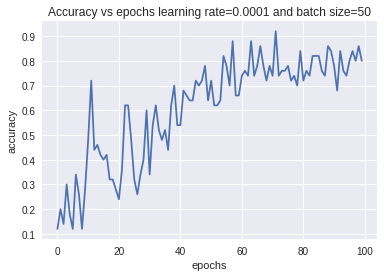

In [65]:
#10
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 50

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step0.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[0], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  1%|          | 1/100 [00:00<00:24,  4.01it/s]

Epoch 0, training accuracy 0.1


 13%|█▎        | 13/100 [00:01<00:08, 10.74it/s]

Epoch 10, training accuracy 0.2


 23%|██▎       | 23/100 [00:01<00:05, 13.70it/s]

Epoch 20, training accuracy 0.1


 33%|███▎      | 33/100 [00:02<00:04, 14.15it/s]

Epoch 30, training accuracy 0.4


 43%|████▎     | 43/100 [00:03<00:03, 14.26it/s]

Epoch 40, training accuracy 0.3


 53%|█████▎    | 53/100 [00:03<00:03, 14.27it/s]

Epoch 50, training accuracy 0.5


 63%|██████▎   | 63/100 [00:04<00:02, 14.19it/s]

Epoch 60, training accuracy 0.2


 73%|███████▎  | 73/100 [00:05<00:01, 14.27it/s]

Epoch 70, training accuracy 0.7


 83%|████████▎ | 83/100 [00:06<00:01, 14.24it/s]

Epoch 80, training accuracy 0.6


 93%|█████████▎| 93/100 [00:06<00:00, 14.24it/s]

Epoch 90, training accuracy 0.6


100%|██████████| 100/100 [00:07<00:00, 13.78it/s]


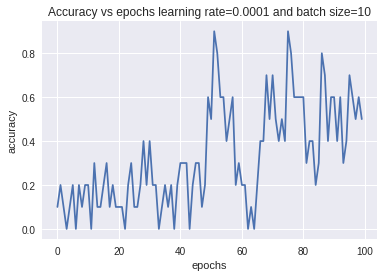

In [66]:
#11
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs_vector = []
accuracy_vector = []
batch_size = 10

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(batch_size)
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
    if(i % 10 == 0):
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))
    epochs_vector.append(i)
    accuracy_vector.append(train_accuracy)
    train_step0.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

plt.title('Accuracy vs epochs learning rate={} and batch size={}'.format(learning_rate[0], batch_size))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs_vector, accuracy_vector)
plt.show()
sess.close()